In [34]:
import pandas as pd
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [35]:
file_path = path.join('..', 'data', 'masked','new_achs_accidents_data.csv')

classified_occupations = pd.read_csv('gpt_results.csv', names=['index', 'ocupacion', 'clasificacion-oit'], on_bad_lines='skip', header=0)
new_achs_accidents_data = pd.read_csv(file_path)
merged_occupations = pd.merge(new_achs_accidents_data, classified_occupations, on='ocupacion', how='inner')
merged_occupations.head()

,id_siniestro,tipo_siniestro,numero_paciente,texto,poblacion,ocupacion,edad,sexo,relato_admision,mecanismo,fecha_creacion,index,clasificacion-oit
0,7242107,2,1007001523,FRACTURA 5TO MTC DERECHO,QUILICURA,supervisor,29.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA CAMINO A MI TR...,12.1,2022-01-03,1,12
1,7253073,1,1000885489,\n27.01.2022 14:00 EVALUACION CONTROL TERAPIA ...,BUIN,supervisor,63.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA DANDO LA PAUTA...,12.1,2022-01-12,1,12
2,7353589,2,1000577480,- Ley\n- Acoge siniestro \n- STP\n- Medicament...,MAIPU,supervisor,69.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA CAMINANDO HACI...,12.1,2022-04-13,1,12
3,7382653,1,1003743753,-Acoge ley\n-Alta inmediata\n-Agendar hora en ...,SANTIAGO,supervisor,29.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA SUPERVISANO A ...,91.2,2022-05-11,1,12
4,7411613,1,1003466800,\nEP EN ESTUDIO \nALTA INMEDIATA \nMELOXICAM 1...,SANTIAGO,supervisor,31.0,masculino,"dolor, hormigueos, tiron muscular",54.2,2022-06-07,1,12


In [36]:
df=merged_occupations[merged_occupations['edad'].isna()==False]

In [37]:
df['fecha_creacion']= pd.to_datetime(df['fecha_creacion'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_11196\2604094246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha_creacion']= pd.to_datetime(df['fecha_creacion'])


In [38]:
df_colum_year= df.copy()
df_colum_year['year']= df['fecha_creacion'].dt.year
df_colum_year['year']=df_colum_year['year'].astype(str)
df_colum_year['day_number']= df['fecha_creacion'].dt.day_of_year
df_colum_year['month']= df['fecha_creacion'].dt.month
df_colum_year['day_of_week'] = df_colum_year['fecha_creacion'].dt.day_name()
df_colum_year['year'].describe()

count     109192
unique         2
top         2023
freq       54621
Name: year, dtype: object

In [39]:
taxi_zones

NameError: name 'taxi_zones' is not defined

In [ ]:
taxi_zones['CUT_REG']=taxi_zones['CUT_REG'].astype(int)

In [ ]:
taxi_zones=taxi_zones.sort_values(by='CUT_REG')

Text(0.5, 1.0, 'Zonas de CHILE')

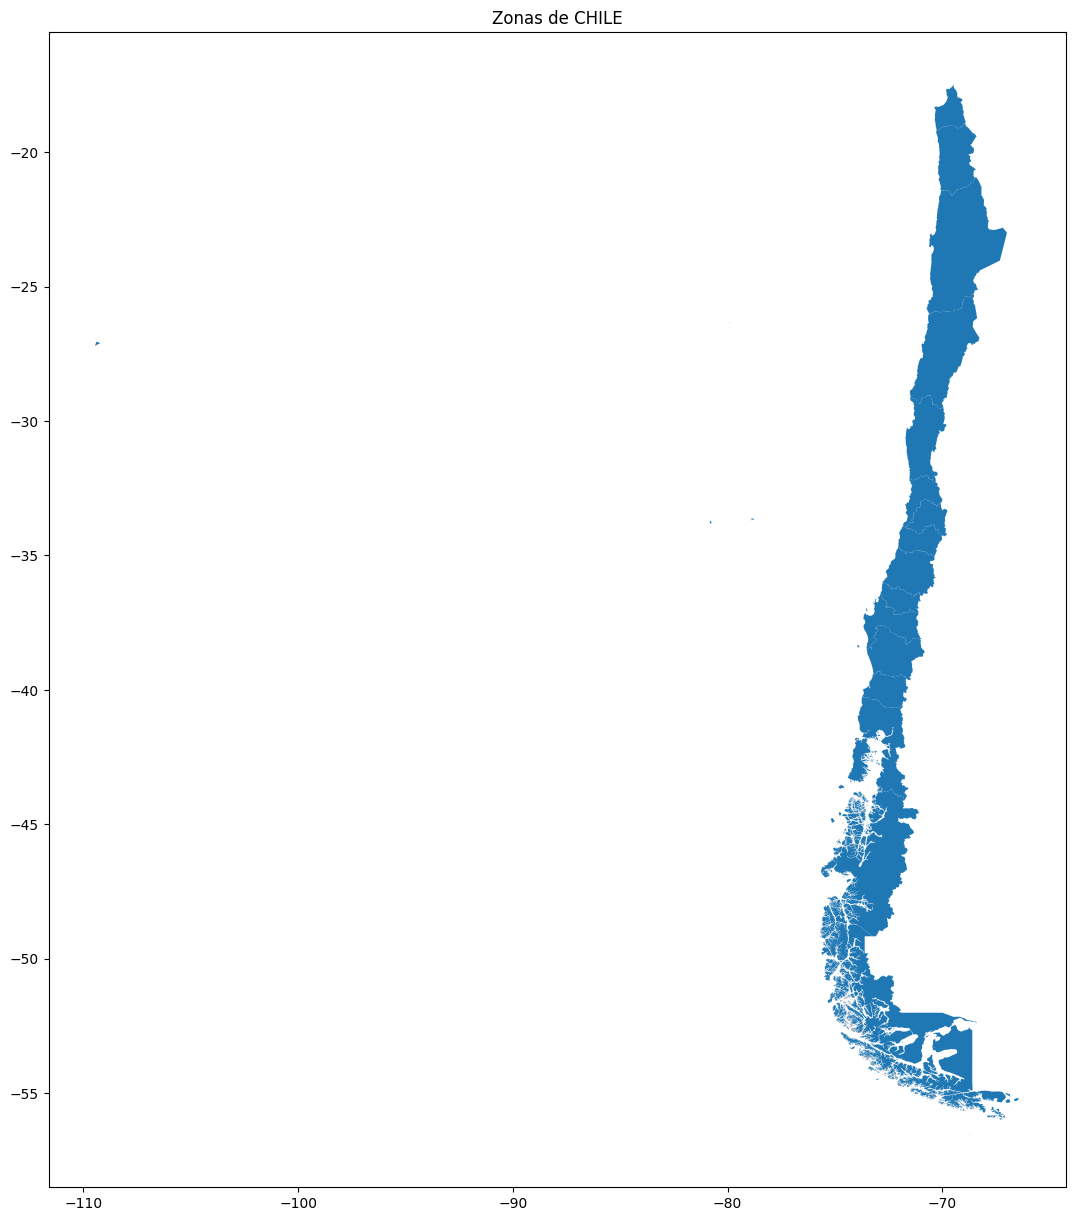

In [ ]:
taxi_zones.plot(figsize=(15,15))
plt.title('Zonas de CHILE')

Cambiamos el nombre de la columna CUT_REG para poder hacer el merge con nuestros datos

In [ ]:
taxi_zones.rename(columns={'CUT_REG': 'region'})



,region,REGION,SUPERFICIE,geometry,freq
0,4,Coquimbo,40587.80,"MULTIPOLYGON (((-71.54427 -31.70873, -71.54432...",5495
1,16,Ñuble,13089.22,"MULTIPOLYGON (((-72.80957 -36.13053, -72.80976...",10578
2,10,Los Lagos,48370.71,"MULTIPOLYGON (((-74.84450 -43.59681, -74.84461...",5625
3,1,Tarapacá,42318.82,"MULTIPOLYGON (((-70.19988 -20.75336, -70.20004...",12079
4,7,Maule,30311.18,"POLYGON ((-70.57013 -36.13255, -70.57042 -36.1...",23435
5,15,Arica y Parinacota,16875.47,"POLYGON ((-69.07223 -19.02723, -69.07200 -19.0...",17647
6,2,Antofagasta,126143.52,"MULTIPOLYGON (((-70.73894 -25.82711, -70.73895...",17611
7,9,La Araucanía,31799.88,"POLYGON ((-71.44071 -38.97731, -71.44082 -38.9...",26326
8,14,Los Ríos,18319.98,"MULTIPOLYGON (((-73.34511 -39.89976, -73.34513...",11522
9,13,Metropolitana de Santiago,15398.38,"POLYGON ((-70.47405 -33.86240, -70.47430 -33.8...",15816


Link de los datos geoespaciales de la division geografica de Chile: https://www.geoportal.cl/geoportal/catalog/36391/Divisi%C3%B3n%20Pol%C3%ADtica%20Administrativa%202023

In [ ]:
file_path = path.join('..', 'data', 'accidentes_genero_numero.csv')
df = pd.read_csv(file_path)




In [ ]:
df.groupby('region').count()

df['region']=df['region'].dropna().astype(int)

#df2=df.groupby('region').count()[['id_siniestro']].join()
#df2

In [ ]:
df['region']

0         10.0
1         13.0
2         13.0
3          8.0
4         10.0
          ... 
342356     7.0
342357     4.0
342358    13.0
342359    13.0
342360    13.0
Name: region, Length: 342361, dtype: float64

In [ ]:
df_geografic= df.join(taxi_zones, on='region', how='outer')

In [ ]:
df_geografic.head()

,id_siniestro,tipo_siniestro,numero_paciente,texto,poblacion,ocupacion,edad,sexo,relato_admision,mecanismo,fecha_creacion,region,CUT_REG,REGION,SUPERFICIE,geometry
0.0,7242104.0,2.0,1.007055e+09,\nSTP\nCONTINUO INDICACION DE MANEJO AMBULATOR...,CHONCHI,Operario,22.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA EN LA GARITA E...,12.10,2022-01-03,10.0,6.0,Libertador General Bernardo O'Higgins,16351.38,"MULTIPOLYGON (((-70.25329 -34.70345, -70.25337..."
4.0,7243063.0,1.0,1.003973e+09,"\nPARACETAMOL 500 MG (A), ORAL, 500 MG, C/8 HR...",PUERTO MONTT,CAJERA,49.0,femenino,AL MOMENTO DEL ACCIDENTE ESTABA ESPERANDO LOCO...,12.10,2022-01-03,10.0,6.0,Libertador General Bernardo O'Higgins,16351.38,"MULTIPOLYGON (((-70.25329 -34.70345, -70.25337..."
35.0,7251220.0,1.0,1.000504e+09,ANALGESIA\nCALOR LOCLA\nMASAJEAR ZONA DE DOLOR...,MAULLIN,ADMINISTRATIVO,68.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA IBA SUBIENDO U...,11.10,2022-01-11,10.0,6.0,Libertador General Bernardo O'Higgins,16351.38,"MULTIPOLYGON (((-70.25329 -34.70345, -70.25337..."
58.0,7255845.0,1.0,1.003878e+09,EMPRESA: AGUAVIVA CARGO: OP\nFECHA Y HORA DE A...,CHONCHI,Operaria,32.0,femenino,AL MOMENTO DEL ACCIDENTE ESTABA ZAJANDO SALMON...,91.21,2022-01-14,10.0,6.0,Libertador General Bernardo O'Higgins,16351.38,"MULTIPOLYGON (((-70.25329 -34.70345, -70.25337..."
96.0,7267280.0,1.0,1.006715e+09,\n24.01.2022 17:45 INSTALACION DE FERULA U ORT...,PUERTO MONTT,operario en altura,28.0,masculino,AL MOMENTO DEL ACCIDENTE ESTABA HIDRO LAVANDO ...,12.10,2022-01-24,10.0,6.0,Libertador General Bernardo O'Higgins,16351.38,"MULTIPOLYGON (((-70.25329 -34.70345, -70.25337..."


# Preguntas de investigacion

¿Donde ocurren mas accidentes?

In [ ]:
freq= df_geografic[df_geografic['region']>0].groupby('region').size()
freq

region
1.0       5495
2.0      10578
3.0       5625
4.0      12079
5.0      23435
6.0      17647
7.0      17611
8.0      26326
9.0      11522
10.0     15816
11.0      2405
12.0      3247
13.0    173303
14.0      6510
15.0      4075
16.0      6678
dtype: int64

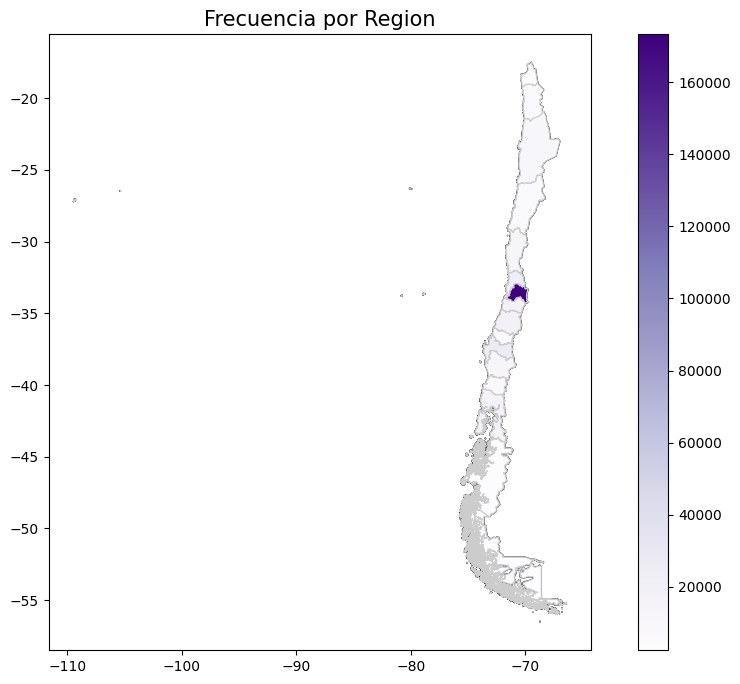

In [ ]:

taxi_zones['freq']=freq.values

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Dibujar el mapa base
taxi_zones.plot(ax=ax, color='lightgrey', edgecolor='black')

# Añadir datos al mapa usando colores para representar las frecuencias
taxi_zones.plot(column='freq', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurar título y leyenda
ax.set_title('Frecuencia por Region', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar la trama
plt.show()

¿Entre mujeres y hombres hay diferencias?

mujeres

In [ ]:
taxi_zones['freq']=freq.values

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Dibujar el mapa base
taxi_zones.plot(ax=ax, color='lightgrey', edgecolor='black')

# Añadir datos al mapa usando colores para representar las frecuencias
taxi_zones.plot(column='freq', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurar título y leyenda
ax.set_title('Frecuencia por Region', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar la trama
plt.show()

hombres

In [ ]:
taxi_zones['freq']=freq.values

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Dibujar el mapa base
taxi_zones.plot(ax=ax, color='lightgrey', edgecolor='black')

# Añadir datos al mapa usando colores para representar las frecuencias
taxi_zones.plot(column='freq', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Configurar título y leyenda
ax.set_title('Frecuencia por Region', fontdict={'fontsize': '15', 'fontweight' : '3'})

# Mostrar la trama
plt.show()

¿Donde trabajan mas adultos mayores?

¿Donde estan situdos nuestros datos?

In [ ]:
df_geografic.groupby(['Region']).size()

NameError: name 'df_geografic' is not defined

¿Donde trabajan mas las mujeres en edad fertil?